# Demo Machine learning From Scratch
the demonstration of machine learning from scratch is Linear Regression, PCA, and KNN Regression

## Regression

we will demonstration the simple linear regression to predicting a salary 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Regression as reg
from sklearn.model_selection import train_test_split

In [2]:
Salary = pd.read_csv('data/Salary_Data.csv')
X_Salary = Salary.iloc[:, :-1].values
y_Salary = Salary.iloc[:, -1].values

In [3]:
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
# Split data to 80% train and 20% test
X_train_Salary, X_test_Salary, y_train_Salary, y_test_Salary = train_test_split(X_Salary, y_Salary, test_size = 0.2, random_state = 0)

In [5]:
# Train data
regressor = reg.LinearRegression(iterations = 1000, learning_rate = 0.01)
regressor.fit(X_train_Salary, y_train_Salary)

In [6]:
# Predicting Data
y_pred_Salary = regressor.predict(X_test_Salary)

In [7]:
y_pred_Salary

array([ 40418.77986122, 122970.09874395,  64808.94225839,  62932.77592015,
       115465.43339097, 107960.768038  ])

In [8]:
# Evaluation Score
reg.Score(y_test_Salary, y_pred_Salary)

Results by manual calculation:
MAE: 2375.640585740566
MSE: 11964042.472043337


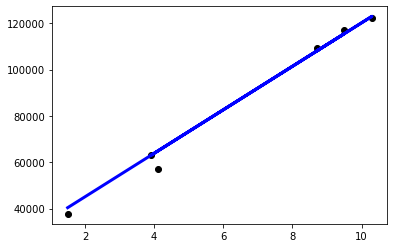

In [9]:
# Plot outputs
plt.scatter(X_test_Salary, y_test_Salary,  color ='black')
plt.plot(X_test_Salary, y_pred_Salary, color ='blue', linewidth=3)

plt.show()

## PCA

we will demonstration the PCA to reduce dimension data wine and predicting the segment with logistic regression from sklearn

In [10]:
# Read and selecting the feature data
wine = pd.read_csv('data/Wine.csv')
X_wine = wine.iloc[:, :-1].values
y_wine = wine.iloc[:, -1].values

In [11]:
# Split data to 80% train and 20% test
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size = 0.2, random_state = 0)

In [12]:
# Standarrization data
from sklearn.preprocessing import StandardScaler
sc_wine = StandardScaler()
X_train_wine = sc_wine.fit_transform(X_train_wine)
X_test_wine = sc_wine.transform(X_test_wine)

In [13]:
# Dimensional Reduction with PCA from Scratch
import PCA as pca
pca_wine = pca.PCA(n_components = 2)
pca_wine.fit(X_train_wine)
X_train_wine = pca_wine.transform(X_train_wine)
X_test_wine = pca_wine.transform(X_test_wine)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_wine, y_train_wine)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_wine = classifier.predict(X_test_wine)
cm = confusion_matrix(y_test_wine, y_pred_wine)
print(cm)
print("Accuracy Score Matrix :",accuracy_score(y_test_wine, y_pred_wine))

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]
Accuracy Score Matrix : 0.9722222222222222


## KNN Regression

we will demonstration the KNN Regression to predicting a education score

In [16]:
house = pd.read_csv("data/housing.csv",  header=None, delim_whitespace=True)
house.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [17]:
X_house = house.drop(columns = {'MEDV', 'ZN', 'AGE', 'INDUS', 'TAX'}).values
y_house = house['MEDV'].values

In [18]:
# Split data to 80% train and 20% test
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_house, y_house, test_size = 0.2, random_state = 0)

In [19]:
# Train Data
import KNNRegresion
knregresor = KNNRegresion.KNNRegression(11)
knregresor.fit(X_train_house, y_train_house)

In [20]:
y_pred_house = knregresor.predict(X_test_house)

In [22]:
KNNRegresion.Score(y_test_house, y_pred_house)

Results by manual calculation:
MAE: 4.194830659536542
MSE: 39.29931777669745
